In [1]:
!pip install pydataset

In [4]:
from pydataset import data

In [8]:
data("co2")

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13
...,...,...
464,1997.583333,362.57
465,1997.666667,360.24
466,1997.750000,360.83
467,1997.833333,362.49


In [9]:
!pip install -U scikit-learn

     ---------------------------------------- 8.4/8.4 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


# simple Linear regression


In [2]:
from pydataset import data
co2_data=data("co2")
co2_data.head()

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13


In [12]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 1 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    468 non-null    float64
 1   co2     468 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


In [3]:
# define x and y
x=co2_data[['time']]
y=co2_data[['co2']]

In [4]:
# Split train test from data set 
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,random_state=123)

In [27]:
y_train

,co2
363,353.53
286,337.69
163,327.88
92,320.20
133,324.89
...,...
231,336.47
99,322.88
323,344.06
383,352.69


In [28]:
import numpy as np

In [5]:
# build model
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train, y_train) # training 

In [6]:
# model Performance
model.score(X_test, y_test)

0.9706169986051827

In [31]:
model.predict([[1959.083333]])

C:\Users\karthick\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[311.59336019]])

In [32]:
model.intercept_

array([-2258.33800765])

# Evaluation Metrics in Linear Regression 

In [9]:
y_pred=model.predict(X_test)
y_pred

array([[316.73125566],
       [350.29154874],
       [320.77598154],
       [315.20081884],
       [312.68652978],
       [337.72010345],
       [354.00832387],
       [349.85428108],
       [334.65922982],
       [349.963598  ],
       [354.33627462],
       [361.55119105],
       [314.10764969],
       [316.84057258],
       [340.01575868],
       [330.06791936],
       [315.41945267],
       [335.31513131],
       [339.68780793],
       [312.90516361],
       [323.18095368],
       [335.64308206],
       [348.32384426],
       [322.52505219],
       [347.33999202],
       [355.53876069],
       [357.06919751],
       [347.44930894],
       [315.09150193],
       [337.39215271],
       [355.10149303],
       [333.45674374],
       [313.12379745],
       [319.35486163],
       [327.88158105],
       [356.3039791 ],
       [326.56977806],
       [328.86543329],
       [321.65051686],
       [328.97475021],
       [325.14865816],
       [351.16608407],
       [332.36357459],
       [343

# mean_absolute_error

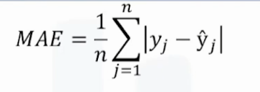

In [11]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.084374866019638

# mean_squared_error

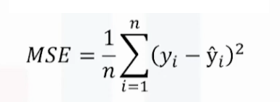

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6.681885077611554

In [24]:
sum((y_test.values.ravel()- y_pred.ravel())**2)/len(y_test)

6.681885077611555

# r2_score

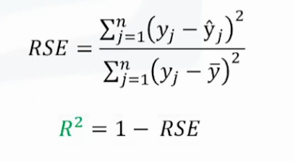

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9706169986051827

In [26]:
model.score(X_test,y_test)  # score is R2 value only

0.9706169986051827

# Multiple Linear Regresssion

In [27]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [29]:
import pandas as pd
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
co2_data=pd.read_csv(path)
co2_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
co2_data.to_csv('FuelConsumptionCo2.csv')